In [1]:
# Import required libraries

import datacube
import ipywidgets as widgets
import pandas as pd
import numpy as np
import folium 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import branca.colormap as cm

In [2]:
dc = datacube.Datacube(app = "FB_ODC")
products = dc.list_products()['name'].to_list()

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\drivers\postgres\_connections.py:84: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [3]:
# Definition of the widgets that allow the user to select the parameters for data selection with the load function

In [4]:
day_options = []
for i in range(1,32,1):
    day_options.append(str(i))

month_options = []
for i in range(1,13,1):
    month_options.append(str(i))
day_options = pd.DataFrame(day_options, columns=['day'])
month_options = pd.DataFrame(month_options, columns=['month'])
year_options = ['2020', '2021']
year_options = pd.DataFrame(year_options, columns=['year'])
product_options = pd.DataFrame(products, columns=['products'])

day = widgets.SelectMultiple(options=['---']+list(day_options['day'].unique()), description='Day:')
month = widgets.SelectMultiple(options=['---']+list(month_options['month'].unique()), description='Month:')
year = widgets.SelectMultiple(options=['---']+list(year_options['year'].unique()), description='Year:')
prod = widgets.SelectMultiple(options=['---']+list(product_options['products'].unique()), description='Product:')

print('Select a Product from datacube:')
display(prod)

print('Select a time interval:')
display(year, month, day)

Select a Product from datacube:


SelectMultiple(description='Product:', options=('---', 'MILAN'), value=())

Select a time interval:


SelectMultiple(description='Year:', options=('---', '2020', '2021'), value=())

SelectMultiple(description='Month:', options=('---', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', …

SelectMultiple(description='Day:', options=('---', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '1…

In [5]:
p = prod.value[0]
y = year.value[0]
m = month.value[0]
d = day.value[0]

if ((y!='---') and (m=='---') and (d=='---')):
    time_range = y
else:
    if ((y!='---') and (m!='---') and (d=='---')):
        time_rage = y + '-' + m
    else:
        if ((y!='---') and (m!='---') and (d!='---')):
            time_range = y + '-' + m + '-' + d
        else:
            print('Error in time selection, please choose a correct time interval')

In [6]:
# The function dc.load allows to load all dataset from the selected product that matches the given spatial and temporal extent
latitude_bounds = (45.311597470877999, 45.627484179430269)
longitude_bounds = (8.995056152343800, 9.549865722656120)
ds = dc.load(product = p,
             time = time_range,
             group_by = 'solar_day')

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-050000.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-050800.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-140800.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-141600.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-211600.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-220000.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-290800.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04-291600.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-04

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05-061600.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05-070000.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05-140000.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05-140800.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05

C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05-210800.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05-211600.nc":n_crisis"
Will use approximate metadata for backwards compatibility reasons (#673).
This behaviour is deprecated. Future versions will raise an error.
  category=DeprecationWarning)
C:\Users\maria\anaconda3\envs\cubeenv\lib\site-packages\datacube\storage\_rio.py:191: DeprecationWarning: Broken/missing geospatial data was found in file:
"NetCDF:"C:\git\FB_ODC_2021\netcdf_files\2020-05

In [7]:
print(ds)
print(type(ds))

<xarray.Dataset>
Dimensions:      (time: 51, latitude: 83, longitude: 102)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-05 2020-04-06 ... 2020-05-25
  * latitude     (latitude) float64 45.31 45.32 45.32 ... 45.62 45.62 45.63
  * longitude    (longitude) float64 8.995 9.001 9.006 ... 9.539 9.544 9.55
    spatial_ref  int32 4326
Data variables:
    n_crisis     (time, latitude, longitude) float64 0.0 20.65 ... -9.999e+03
Attributes:
    crs:           epsg:4326
    grid_mapping:  spatial_ref
<class 'xarray.core.dataset.Dataset'>


In [8]:
latitude_extents = (min(ds['latitude'].values),max(ds['latitude'].values))
longitude_extents = (min(ds['longitude'].values),max(ds['longitude'].values))
time_extents = (min(ds['time'].values),max(ds['time'].values))
latitude_extents = (min(ds['latitude'].values),max(ds['latitude'].values))
longitude_extents = (min(ds['longitude'].values),max(ds['longitude'].values))
time_extents = (min(ds['time'].values),max(ds['time'].values))
print('Latitude bounds: ', latitude_extents)
print('Longitude_bounds: ', longitude_extents)
print('Time_range: ', time_extents)

Latitude bounds:  (45.31240743101098, 45.62829413956298)
Longitude_bounds:  (8.995056152342137, 9.549865722654538)
Time_range:  (numpy.datetime64('2020-04-05T00:00:00.000000000'), numpy.datetime64('2020-05-25T00:00:00.000000000'))


# DATA ANALYSIS

# Plot of mean/variance/median over time

In [9]:
# User through a widget selects an operator between mean, variance and median.
# The function 'plot_time-op' returns for each time the result of the chosen operator on the data ('n_crisis')
# Results of the function are returned as lists, in this example are plotted in a graph

options = ['Mean', 'Variance', 'Median']
df_options = pd.DataFrame(options, columns=['options'])
sel_operator = widgets.SelectMultiple(
    options=['---']+list(df_options['options'].unique()),
    description='Operator:'
)
display(sel_operator)

SelectMultiple(description='Operator:', options=('---', 'Mean', 'Variance', 'Median'), value=())

In [10]:
operator = sel_operator.value[0]

In [11]:
def plot_time_op(operator, ds):
    time_list = ds.time.to_dataframe()
    time_list = time_list['time'].tolist()
    y = []
    for i in time_list:
        df_i = ds.sel(time=i).to_dataframe()
        df_i = df_i.reset_index().replace(to_replace=-9999, value=0)
        if operator == 'Mean':
            mean_i = df_i['n_crisis'].mean()
            y.append(mean_i)
        elif operator == 'Variance':
            std_i = df_i['n_crisis'].std()
            y.append(std_i)
        elif operator == 'Median':
            med_i = df_i['n_crisis'].median()
            y.append(med_i)
    return [time_list, y]

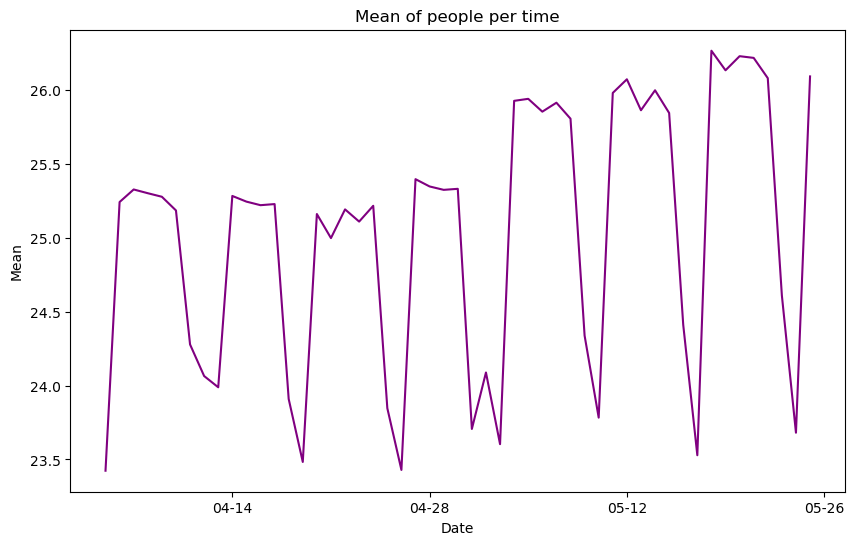

In [12]:
axes = plot_time_op(operator, ds)
x = axes[0]
y = axes[1]
title = operator + ' of people per time'

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y,
        '-',
        color='purple')
ax.set(xlabel="Date", ylabel=operator, title=title)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.show()

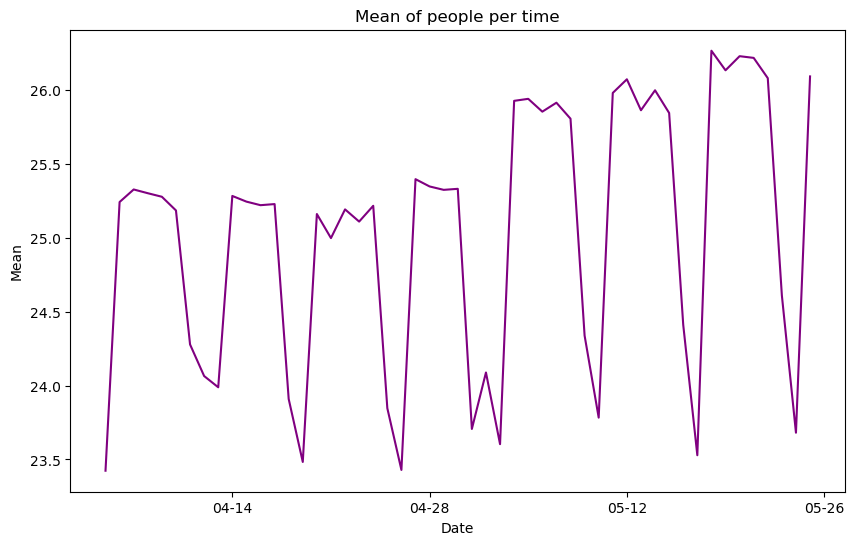

# Time Series

In [ ]:
# The user inserts the precise coordinates of a point, the function temporal_series extraxt from the dataset the number of people
# present in that point in the chosen time interval
lat_widg = widgets.FloatText(value='0.0', description='Latitude:')
lon_widg = widgets.FloatText(value='0.0', description='Longitude:')
display(lat_widg, lon_widg)

In [ ]:
lat = lat_widg.value
lon = lon_widg.value

In [ ]:
def temporal_series(ds, lat, lon):
    df = ds.sel(latitude=lat, longitude=lon).to_dataframe().reset_index()
    df = df[['time', 'n_crisis']]
    df = df.replace(to_replace=-9999, value=0)
    return df

In [ ]:
temp_df = temporal_series(ds, lat, lon)
x = temp_df['time']
y = temp_df['n_crisis']

fig, ax = plt.subplots(figsize=(10,6))
title = 'Time series for point: ('+str(lat)+','+str(lon)+')'
ax.plot(x, y,
        '-',
        color='purple')
ax.set(xlabel="Date", ylabel=operator, title=title)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.show()

# Mean/variance/median of each point over time

In [13]:
display(sel_operator)

SelectMultiple(description='Operator:', index=(1,), options=('---', 'Mean', 'Variance', 'Median'), value=('Mea…

In [14]:
operator = sel_operator.value[0]

In [15]:
# The following function allow to create a grid, each point of the grid contains the mean/variance/median 
# of the registered value across time interval
def grid_of_op(operator, ds):
    lon_list = ds.longitude.to_dataframe()
    lon_list = lon_list['longitude'].tolist()
    lat_list = ds.latitude.to_dataframe()
    lat_list = lat_list['latitude'].tolist()
    
    grid_op = pd.DataFrame(columns = ['latitude', 'longitude', 'value'])
    for i in lat_list:
        for j in lon_list:
            df_i = ds.sel(longitude=j, latitude=i).to_dataframe().reset_index().replace(to_replace=-9999, value=0)
            if operator == 'Mean':
                val = df_i['n_crisis'].mean()
            elif operator == 'Variance':
                val = df_i['n_crisis'].std()
            elif operator == 'Median':
                val = df_i['n_crisis'].median()
            row = pd.DataFrame([[i, j, val]], columns = ['latitude', 'longitude', 'value'])
            grid_op = grid_op.append(row)
    return grid_op

In [16]:
grid = grid_of_op(operator, ds)
grid = grid.reset_index().drop(columns=['index'])

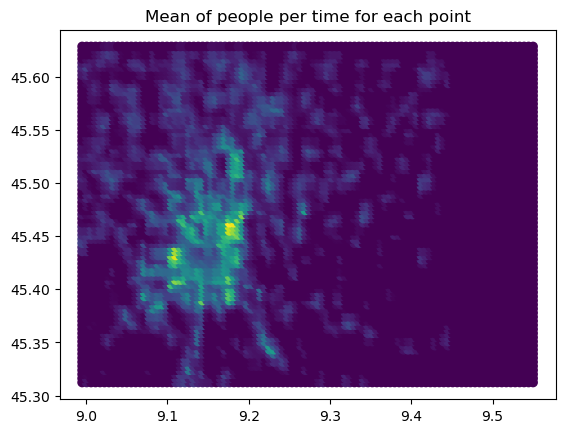

In [17]:
#A first visualization of the data obtained is given with the matplotlib scatter tool
df = grid
title = operator + ' of people per time for each point'
fig = plt.scatter(x=df['longitude'], y=df['latitude'], marker = 'o', c = df['value'])
plt.title(title)
plt.show(fig)

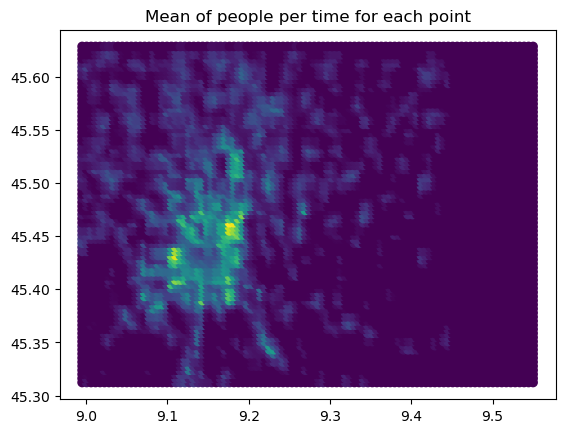

In [18]:
# Data visualization is poor and difficult to be read and understand
# In order to give a better representation we decided to use the folium library to build an interactive map of the data

# We select only not-null values 
df = df[df['value']!=0].reset_index()
df = df[['latitude', 'longitude', 'value']]

In [19]:
# Creation of the map and of the color scale used for data visualization
m = folium.Map(location=[45.4773, 9.1815], zoom_start=11)
cmap = cm.LinearColormap(colors=['yellow','green', 'red', 'blue'], vmin=df['value'].min(), vmax=df['value'].max(), caption='Density Population')
cmap

In [20]:
lat = list(df.latitude)
lon = list(df.longitude)
v = list(df.value)
for loc, p in zip(zip(lat, lon), v):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color=cmap(p),
        fill_opacity=0.7
    ).add_to(m)
m.add_child(cmap)

In [22]:
m.save('map.html')

In [23]:
municipalities = pd.read_csv('C:/git/FB_ODC_2021/mun.csv')
municipalities

Unnamed: 0  MUNICIPIO          AREA   PERIMETRO  \
0           0          1  9.426872e+06  11935.5825   
1           1          8  2.390648e+07  32807.3751   
2           2          9  2.101349e+07  27157.1251   
3           3          2  1.262855e+07  20971.2966   
4           4          3  1.443424e+07  25665.7875   
5           5          4  2.069548e+07  22716.0101   
6           6          7  3.136342e+07  45390.1230   
7           7          6  1.833622e+07  22297.3464   
8           8          5  2.995886e+07  29712.8420   

                                            geometry  \
0  MULTIPOLYGON (((515194.5037806356 5036236.6888...   
1  MULTIPOLYGON (((507753.4243955159 5041976.5510...   
2  MULTIPOLYGON (((513719.8337595349 5042466.8100...   
3  MULTIPOLYGON (((517487.7273186704 5041139.6156...   
4  MULTIPOLYGON (((520992.0431757369 5039681.1817...   
5  MULTIPOLYGON (((520916.1562070916 5035424.9963...   
6  MULTIPOLYGON (((505710.6872533277 5039170.1402...   
7  MULTIPOLYGON (((510925.9548200332 5034164.8342...   
8  MULTIPOLYGON (((514823.0134677999 5033178.5608...   

                                                   g  
0  MULTIPOLYGON (((515194.5037806356 5036236.6888...  
1  MULTIPOLYGON (((507753.4243955159 5041976.5510...  
2  MULTIPOLYGON (((513719.8337595349 5042466.8100...  
3  MULTIPOLYGON (((517487.7273186704 5041139.6156...  
4  MULTIPOLYGON (((520992.0431757369 5039681.1817...  
5  MULTIPOLYGON (((520916.1562070916 5035424.9963...  
6  MULTIPOLYGON (((505710.6872533277 5039170.1402...  
7  MULTIPOLYGON (((510925.9548200332 5034164.8342...  
8  MULTIPOLYGON (((514823.0134677999 5033178.5608...

In [ ]:

sum = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(grid)):
    lat_i = grid['latitude'][i]
    lon_i = grid['longitude'][i]
    dist = 1000000 
    for j in range(len(landmarks)):
        lat_j = landmarks['lat'][j]
        lon_j = landmarks['lon'][j]
        dist_j = np.sqrt((lat_j-lat_i)**2 + (lat_j-lat_i)**2)
        if dist_j < dist:
            dist = dist_j
            j_to_sum = j
    sum[j_to_sum] = sum[j_to_sum] + grid['value'][i]

In [ ]:
sum

In [ ]:
landmarks['av_people'] = sum

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import geopandas as gpd
from geopandas import GeoDataFrame
import json

In [ ]:
df = pd.read_csv('C:/git/FB_ODC_2021/cubeenv/grid_mean.csv')
df

In [ ]:
sample_df = df

mun = gpd.read_file("C:/git/FB_ODC_2021/MI_ZONES.geojson")
mun = mun.to_crs("EPSG:4326")

In [ ]:
from shapely.geometry import Point

points = []
for i in range(len(df)):
    Pi = Point(df['longitude'][i], df['latitude'][i])
    points.append(Pi)

df['geometry'] = points
gdf = gpd.GeoDataFrame(df, geometry = 'geometry', crs='epsg:4326')

In [ ]:
gdf

In [ ]:
sample_gdf = gdf.sample(20)

fig, ax = plt.subplots(figsize = (10,8))
fig = mun.boundary.plot(ax=ax, edgecolor = 'black')
fig = sample_gdf.plot(ax=ax)

plt.show(fig)

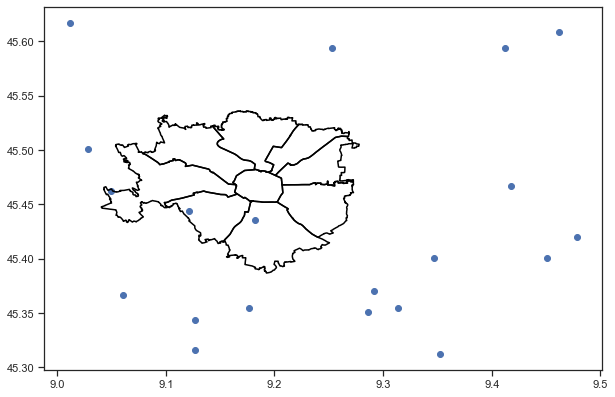

In [ ]:
join = gpd.sjoin(gdf, mun, how="inner", op="within").reset_index()

In [ ]:
join = join[['latitude', 'longitude', 'value', 'MUNICIPIO', 'AREA', 'geometry']]
join

In [ ]:
tot = []
mean_tot = []

for i in range(len(mun)):
    m_i = mun['MUNICIPIO'][i]
    mask = join[join['MUNICIPIO'] == m_i]
    v_i = mask['value'].sum()
    med_i = mask['value'].mean()
    tot.append(v_i)
    mean_tot.append(med_i)

mun['tot_people'] = tot
mun['media_district'] = mean_tot

In [ ]:
import contextily as ctx

fig, ax = plt.subplots(figsize = (12,10))

mun.plot(column='media_district', cmap='Reds', linewidth=1, ax=ax, 
                  edgecolor='0.3', alpha = 0.8)    

sm = plt.cm.ScalarMappable(cmap='Reds' , 
            norm=plt.Normalize(vmin=min(mun['media_district']), 
                               vmax=max(mun['media_district'])))

ax.axis('off')
cbar = fig.colorbar(sm)
ctx.add_basemap(ax, crs='EPSG:4326')
                     
plt.show()

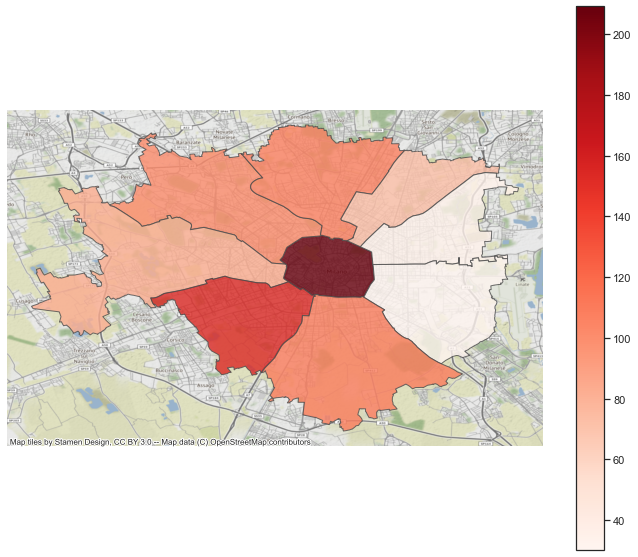